In [161]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('Set2')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [162]:
df = pd.read_csv("C:\\Users\\Dhinesh\\Downloads\\archive\\Clean_Dataset.csv")

In [163]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [165]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.00,86646.85,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.22,7.19,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.00,13.56,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.66,22697.77,1105.00,4783.00,7425.00,42521.00,123071.00


In [166]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

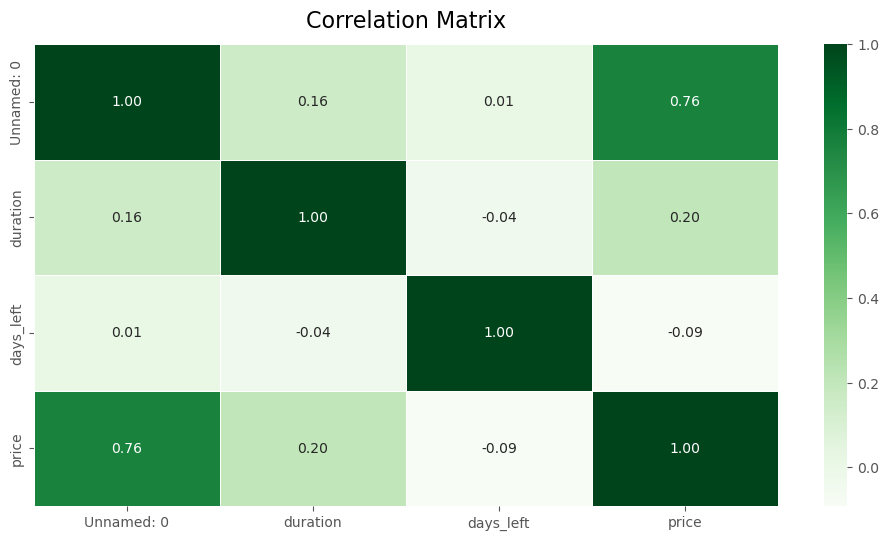

In [167]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(corr, annot = True, fmt = '.2f', linecolor='white', linewidths=0.5, cmap = 'Greens')
ax.set_title('Correlation Matrix', fontsize = 16, pad = 12)
plt.show()

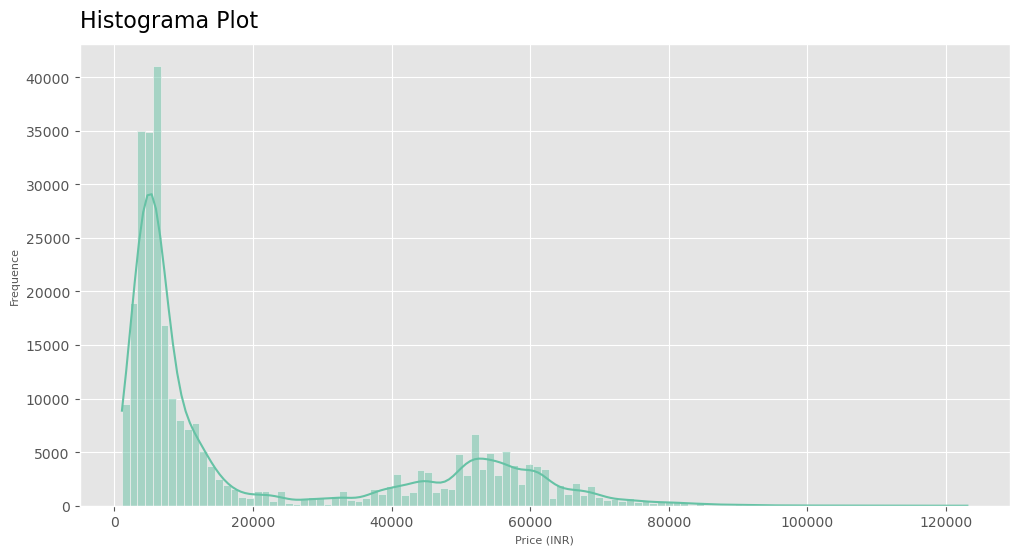

In [168]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.histplot(df.price, kde = True)
ax.set_title('Histograma Plot', loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel('Price (INR)', fontsize = 8)
ax.set_ylabel('Frequence', fontsize = 8)
plt.show()

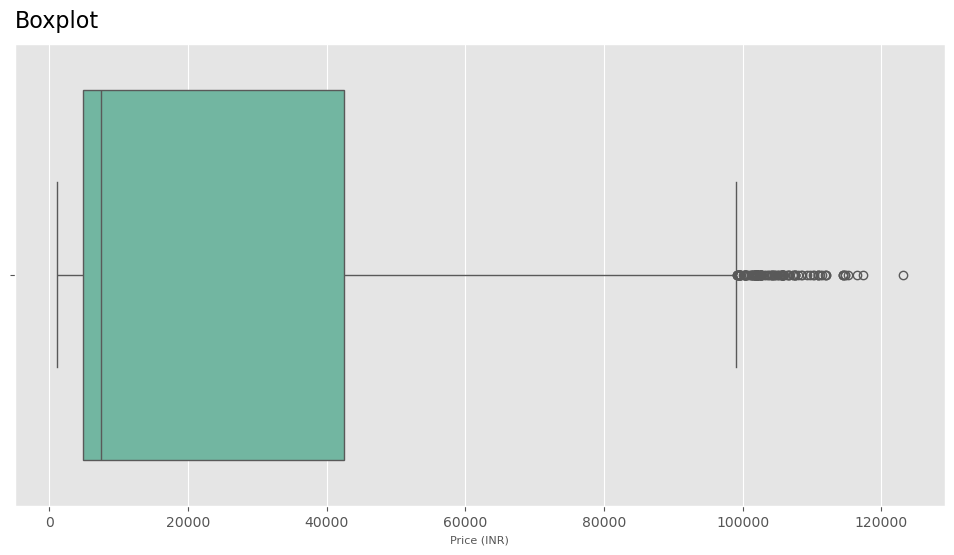

In [169]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.boxplot(df, x = df.price)
ax.set_title('Boxplot', loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel('Price (INR)', fontsize = 8)
plt.show()

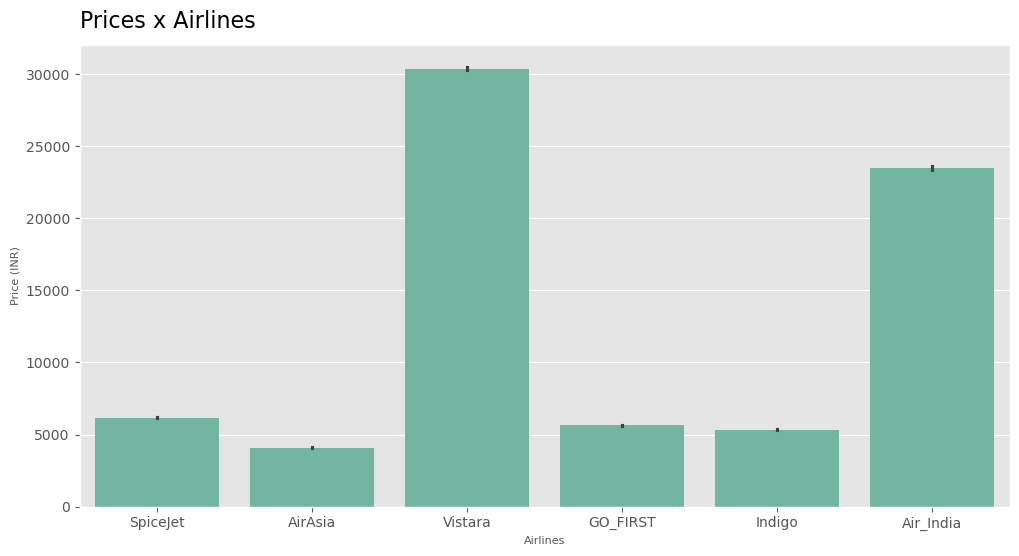

In [170]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(df, x = df.airline, y = df.price)
ax.set_title('Prices x Airlines', loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel('Airlines', fontsize = 8)
ax.set_ylabel('Price (INR)', fontsize = 8)
plt.show()

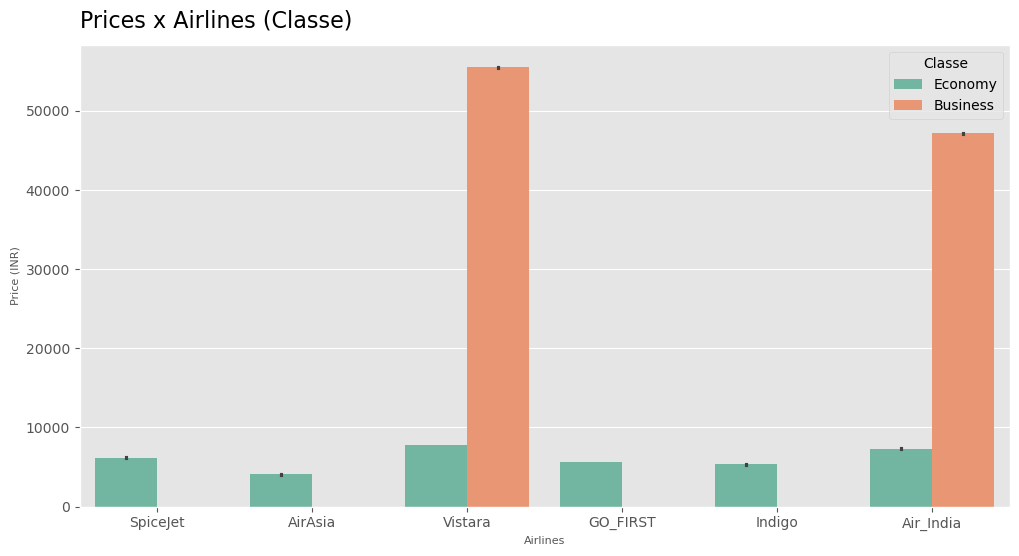

In [171]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(df, x = df.airline, y = df.price, hue = df['class'])
ax.set_title('Prices x Airlines (Classe)', loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel('Airlines', fontsize = 8)
ax.set_ylabel('Price (INR)', fontsize = 8)
plt.legend(title = 'Classe')
plt.show()

In [172]:
def maior(i):
    if i > 2:
        return 'Mais de 2 dias'
    else:
        return 'Menos de 2 dias'

In [173]:
df_days = df.copy()
df_days['days'] = df['days_left'].apply(maior)

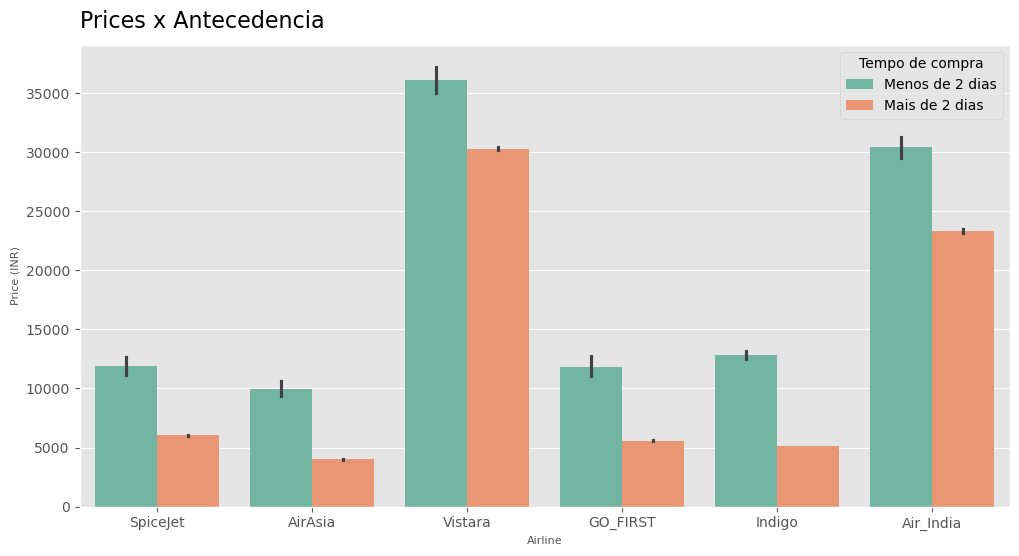

In [174]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(df_days, x = df_days.airline, y = df_days.price, hue = df_days.days)
ax.set_title("Prices x Antecedencia", loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel("Airline", fontsize = 8)
ax.set_ylabel("Price (INR)", fontsize = 8)
plt.legend(title = 'Tempo de compra')
plt.show()

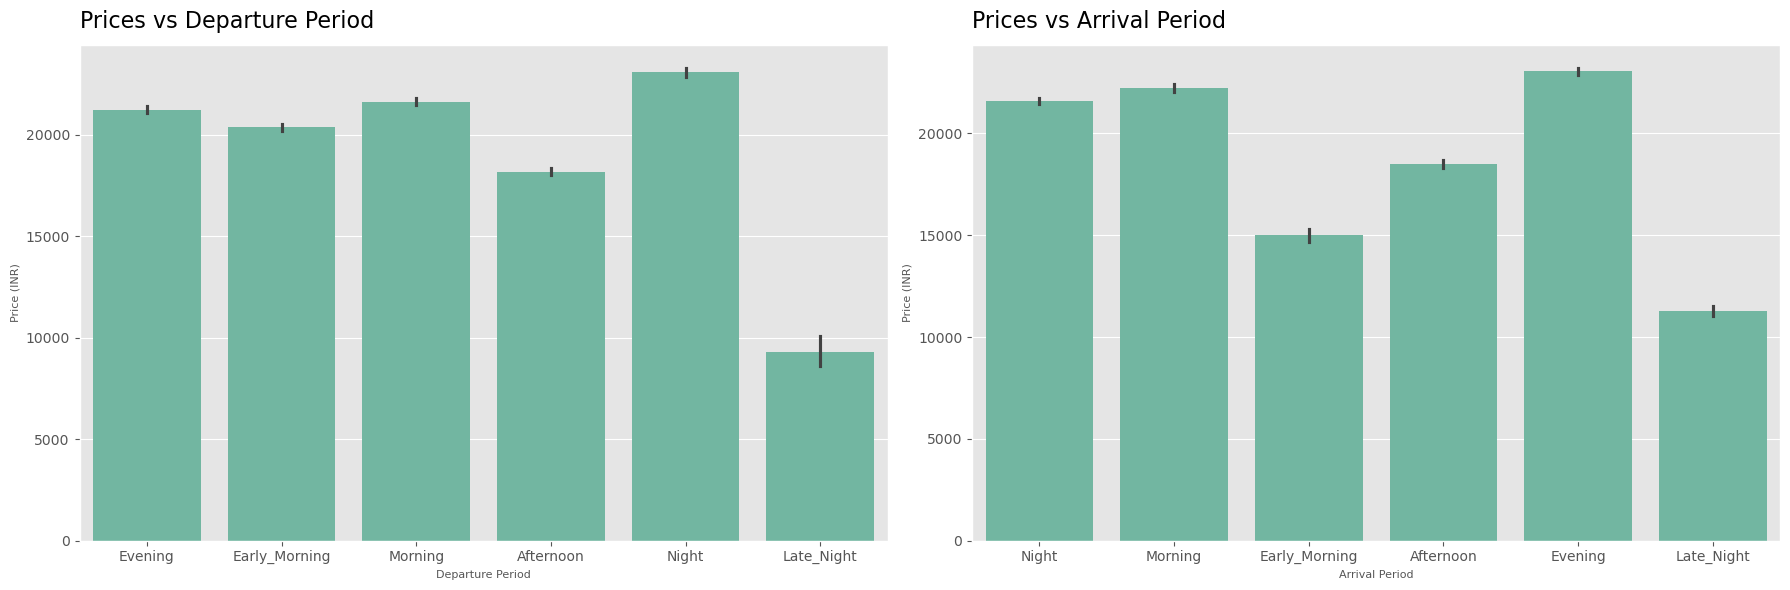

In [175]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

sns.barplot(ax = axes[0], data = df, x = df.departure_time, y = df.price)
axes[0].set_title("Prices vs Departure Period", loc = 'left', fontsize = 16, pad = 12)
axes[0].set_xlabel("Departure Period", fontsize = 8)
axes[0].set_ylabel("Price (INR)", fontsize = 8)

sns.barplot(ax = axes[1], data = df, x = df.arrival_time, y = df.price)
axes[1].set_title("Prices vs Arrival Period", loc = 'left', fontsize = 16, pad = 12)
axes[1].set_xlabel("Arrival Period", fontsize = 8)
axes[1].set_ylabel("Price (INR)", fontsize = 8)

plt.tight_layout()
plt.show()

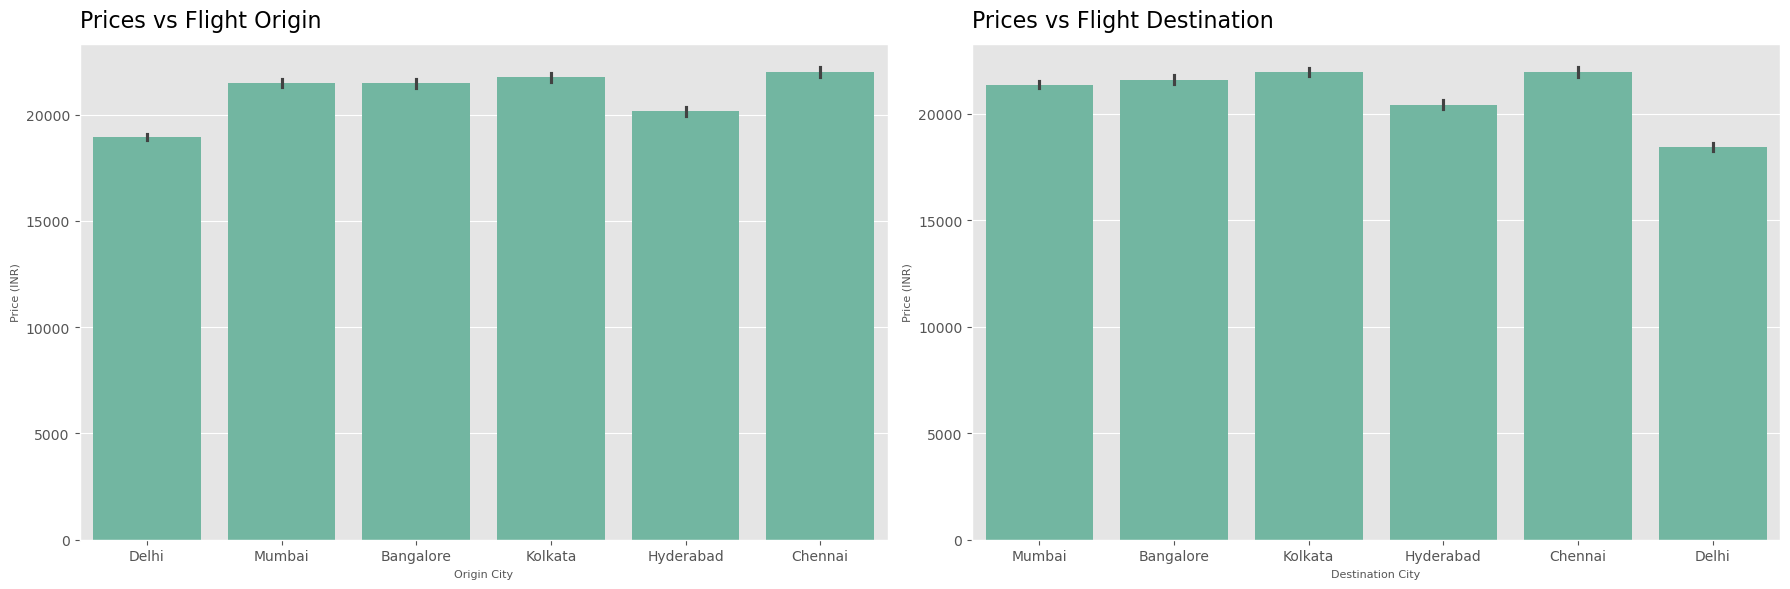

In [176]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

sns.barplot(ax = axes[0], data = df, x = df.source_city, y = df.price)
axes[0].set_title("Prices vs Flight Origin", loc = 'left', fontsize = 16, pad = 12)
axes[0].set_xlabel("Origin City", fontsize = 8)
axes[0].set_ylabel("Price (INR)", fontsize = 8)

sns.barplot(ax = axes[1], data = df, x = df.destination_city, y = df.price)
axes[1].set_title("Prices vs Flight Destination", loc = 'left', fontsize = 16, pad = 12)
axes[1].set_xlabel("Destination City", fontsize = 8)
axes[1].set_ylabel("Price (INR)", fontsize = 8)

plt.tight_layout()
plt.show()